<p align="center">
  <img src="resources/bigdive.png" alt="BDINTESA"/>
</p>

# ANALISI PREDITTIVITA 

## SOTTOTITOLO (opzionale)

- Partecipante 1
- Partecipante 2
- Partecipante 3

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
from sklearn.linear_model import LinearRegression
from sklearn import metrics, cross_validation
from sklearn import grid_search
from sklearn import naive_bayes
from sklearn import svm
from sklearn import tree

In [3]:
train_set = pd.read_csv('../CONTEST_TRAINING_SET_PUBBLICO.CSV')

In [4]:
train_set.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA
0,1,83013.0,AV,1977.0,243,430,4120.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,135220.0,0.0
1,2,84131.0,SA,1984.0,614,492,4719.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,844348.0,1054419.0,0.0
2,3,82030.0,BN,1952.0,12,430,11021.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332366.0,0.0
3,4,80133.0,NaN,1982.0,830,430,4120.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51762483.0,0.0
4,5,72021.0,BR,1989.0,419,482,10711.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37562.0,34857.0,0.0


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66811 entries, 0 to 66810
Data columns (total 19 columns):
ID                                   66811 non-null int64
COD_CAP                              66736 non-null float64
COD_PROVINCIA                        63938 non-null object
DAT_COSTITUZIONE                     66580 non-null float64
COD_RAE                              66811 non-null int64
COD_SAE                              66811 non-null int64
COD_ISTAT_ATECO_07                   66386 non-null float64
FLG_DEF_6M                           66811 non-null int64
CBI201312_CREDITI                    57571 non-null float64
CBI201312_UTILE_PERDITA_ESERCIZIO    53997 non-null float64
CBI201312_PATRIMONIO_NETTO           53997 non-null float64
CBI201312_DEBITI_CONSOLIDATI         57571 non-null float64
CBI201312_DEBITI_ENTRO_ES_SUCC       57571 non-null float64
CBI201312_RICAVI_NETTI               53997 non-null float64
CBI201312_ACQUISTI_NETTI             53997 non-null float64


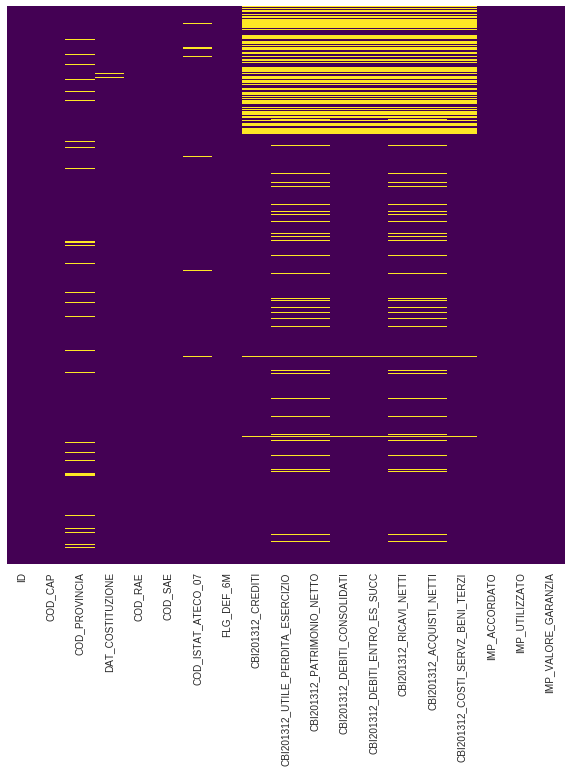

In [6]:
#Analisi dati mancanti
plt.figure(figsize=(10,10))
sns.heatmap(train_set.isnull(),yticklabels=False, cbar=False,cmap='viridis')

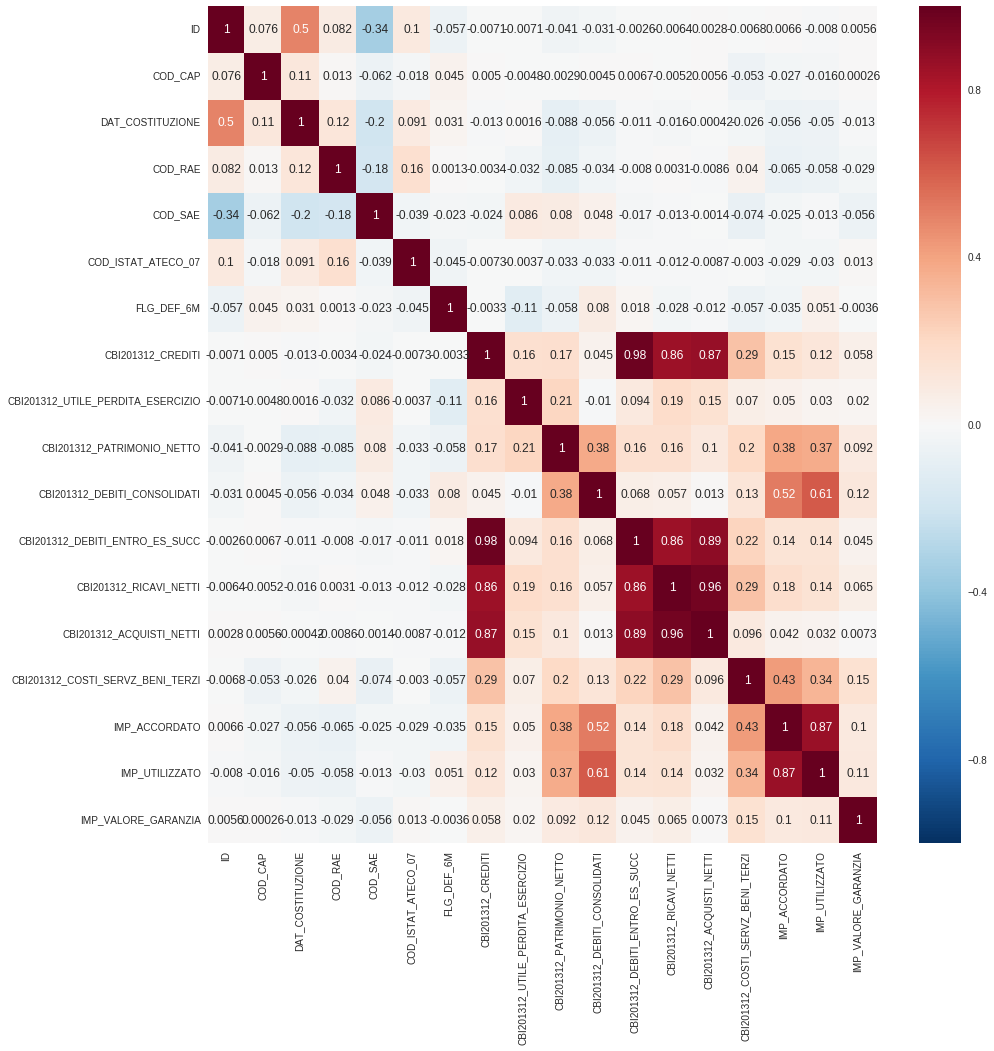

In [7]:
#Analisi della correlazione dei dati
figure = plt.figure(figsize=(15,15))
sns.heatmap(train_set.corr(),annot=True)

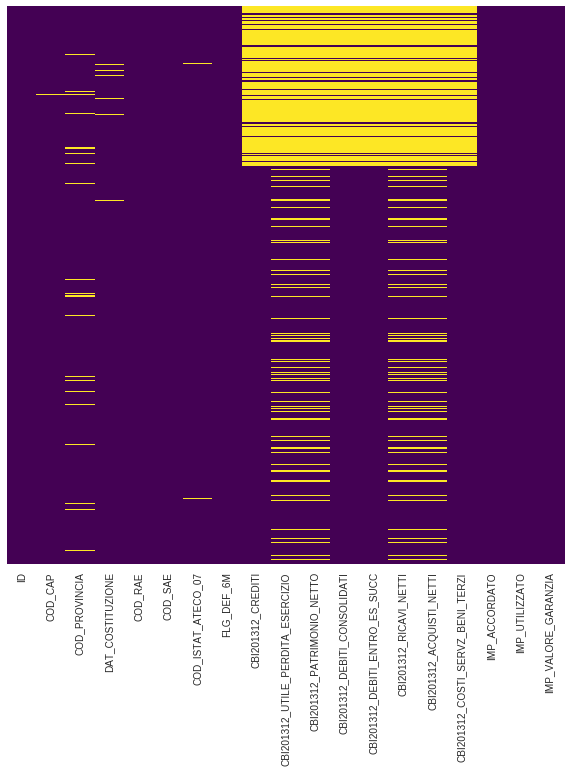

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set[train_set['FLG_DEF_6M']==1].isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [9]:
train_set['CBI201312_CREDITI'].value_counts().head()

0.0    2337
1.0     332
2.0     284
3.0     284
4.0     262
Name: CBI201312_CREDITI, dtype: int64

In [10]:
train_set[train_set['CBI201312_CREDITI'].isnull()].count()

ID                                   9240
COD_CAP                              9170
COD_PROVINCIA                        8837
DAT_COSTITUZIONE                     9043
COD_RAE                              9240
COD_SAE                              9240
COD_ISTAT_ATECO_07                   8982
FLG_DEF_6M                           9240
CBI201312_CREDITI                       0
CBI201312_UTILE_PERDITA_ESERCIZIO       0
CBI201312_PATRIMONIO_NETTO              0
CBI201312_DEBITI_CONSOLIDATI            0
CBI201312_DEBITI_ENTRO_ES_SUCC          0
CBI201312_RICAVI_NETTI                  0
CBI201312_ACQUISTI_NETTI                0
CBI201312_COSTI_SERVZ_BENI_TERZI        0
IMP_ACCORDATO                        9240
IMP_UTILIZZATO                       9240
IMP_VALORE_GARANZIA                  9240
dtype: int64

In [11]:
train_set[train_set['CBI201312_RICAVI_NETTI'].isnull()].count()

ID                                   12814
COD_CAP                              12744
COD_PROVINCIA                        12288
DAT_COSTITUZIONE                     12607
COD_RAE                              12814
COD_SAE                              12814
COD_ISTAT_ATECO_07                   12555
FLG_DEF_6M                           12814
CBI201312_CREDITI                     3574
CBI201312_UTILE_PERDITA_ESERCIZIO        0
CBI201312_PATRIMONIO_NETTO               0
CBI201312_DEBITI_CONSOLIDATI          3574
CBI201312_DEBITI_ENTRO_ES_SUCC        3574
CBI201312_RICAVI_NETTI                   0
CBI201312_ACQUISTI_NETTI                 0
CBI201312_COSTI_SERVZ_BENI_TERZI      3574
IMP_ACCORDATO                        12814
IMP_UTILIZZATO                       12814
IMP_VALORE_GARANZIA                  12814
dtype: int64

In [12]:
train_set[train_set['IMP_ACCORDATO'].isnull()].count()

ID                                   0
COD_CAP                              0
COD_PROVINCIA                        0
DAT_COSTITUZIONE                     0
COD_RAE                              0
COD_SAE                              0
COD_ISTAT_ATECO_07                   0
FLG_DEF_6M                           0
CBI201312_CREDITI                    0
CBI201312_UTILE_PERDITA_ESERCIZIO    0
CBI201312_PATRIMONIO_NETTO           0
CBI201312_DEBITI_CONSOLIDATI         0
CBI201312_DEBITI_ENTRO_ES_SUCC       0
CBI201312_RICAVI_NETTI               0
CBI201312_ACQUISTI_NETTI             0
CBI201312_COSTI_SERVZ_BENI_TERZI     0
IMP_ACCORDATO                        0
IMP_UTILIZZATO                       0
IMP_VALORE_GARANZIA                  0
dtype: int64

In [13]:
train_set[train_set['CBI201312_DEBITI_CONSOLIDATI'].notnull()].count()

ID                                   57571
COD_CAP                              57566
COD_PROVINCIA                        55101
DAT_COSTITUZIONE                     57537
COD_RAE                              57571
COD_SAE                              57571
COD_ISTAT_ATECO_07                   57404
FLG_DEF_6M                           57571
CBI201312_CREDITI                    57571
CBI201312_UTILE_PERDITA_ESERCIZIO    53997
CBI201312_PATRIMONIO_NETTO           53997
CBI201312_DEBITI_CONSOLIDATI         57571
CBI201312_DEBITI_ENTRO_ES_SUCC       57571
CBI201312_RICAVI_NETTI               53997
CBI201312_ACQUISTI_NETTI             53997
CBI201312_COSTI_SERVZ_BENI_TERZI     57571
IMP_ACCORDATO                        57571
IMP_UTILIZZATO                       57571
IMP_VALORE_GARANZIA                  57571
dtype: int64

In [14]:
numeroAziendeFalliteSuTuttoDataSet = train_set['ID'][train_set['FLG_DEF_6M']==1].count()
numeroAziendePresentiSuTuttoDataSet = train_set['ID'].count()
print(numeroAziendeFalliteSuTuttoDataSet)
print(numeroAziendePresentiSuTuttoDataSet)

11062
66811


In [15]:
print(train_set['CBI201312_UTILE_PERDITA_ESERCIZIO'][(train_set['CBI201312_DEBITI_CONSOLIDATI'].notnull())&(train_set['FLG_DEF_6M']==1)].count())
print(train_set['CBI201312_UTILE_PERDITA_ESERCIZIO'][train_set['CBI201312_DEBITI_CONSOLIDATI'].notnull()].count())

7434
53997


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]), <a list of 108 Text xticklabel objects>)

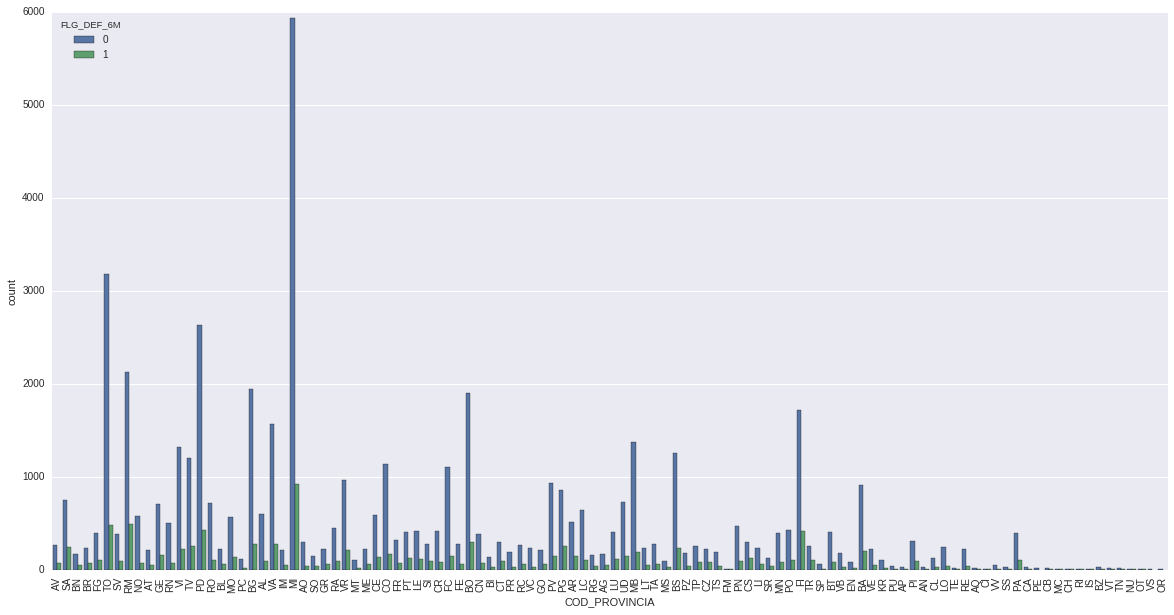

In [16]:
# ANALISI PROVINCIE
plt.figure(figsize=(20,10))
c_plot =sns.countplot(data=train_set, x='COD_PROVINCIA',hue='FLG_DEF_6M')
plt.xticks(rotation=90)

## Verifiche eliminando gli NA

In [17]:
train_set_senza_na = train_set.dropna()

In [18]:
# Numero NA
train_set_senza_na.shape

(51469, 19)

## PULIZIA DATI

In [19]:
#CREAZIONE TRAIN SET RIVISTO ANDANDO AD ESCLUDERE I RECORD SENZA DATI DI BILANCIO SUI QUALI NON SI RITIENE DI FARE UNA STIMA SIGNIFICATIVA
cleaned_train_set = train_set.dropna(subset=['CBI201312_CREDITI','CBI201312_UTILE_PERDITA_ESERCIZIO','CBI201312_PATRIMONIO_NETTO','CBI201312_DEBITI_CONSOLIDATI',
                                                                        'CBI201312_DEBITI_ENTRO_ES_SUCC','CBI201312_RICAVI_NETTI','CBI201312_ACQUISTI_NETTI','CBI201312_COSTI_SERVZ_BENI_TERZI'])

In [20]:
cleaned_train_set.shape

(53997, 19)

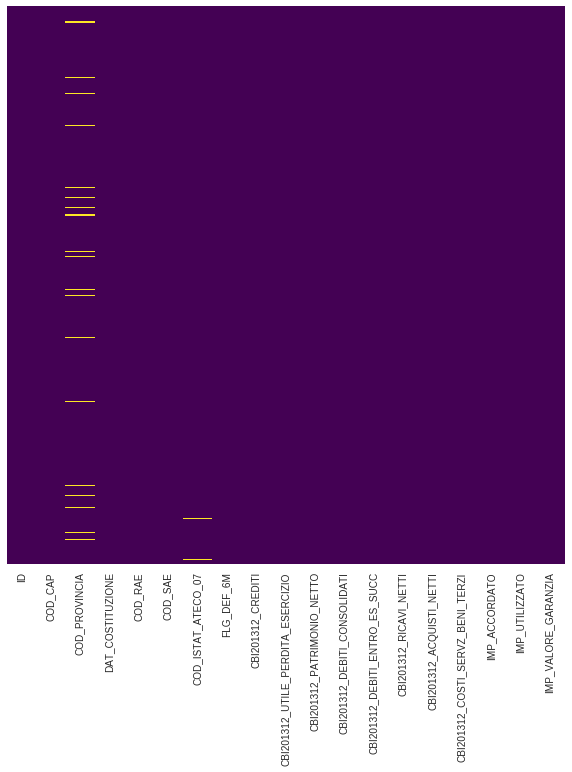

In [21]:
#EVIDENZA DI COME E' MIGLIORATO IL TRAINING SET
plt.figure(figsize=(10,10))
sns.heatmap(cleaned_train_set.isnull(),yticklabels=False, cbar=False,cmap='viridis')

## AGGIUNTA INDICI FINANZIARI

In [22]:
cleaned_train_set['LEVERAGE']=(cleaned_train_set['CBI201312_DEBITI_CONSOLIDATI']+cleaned_train_set['CBI201312_DEBITI_ENTRO_ES_SUCC']+1)/(cleaned_train_set['CBI201312_PATRIMONIO_NETTO']+1)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [23]:
cleaned_train_set.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA,LEVERAGE
9,10,187.0,RM,2010.0,505,430,412000.0,0,1.0,-3.0,7.0,20.0,389.0,0.0,0.0,3.0,850000.0,0.0,0.0,51.250000
10,11,28013.0,NO,1971.0,648,430,47192.0,0,23.0,9.0,239.0,818.0,469.0,1804.0,1466.0,197.0,987900.0,922900.0,0.0,5.366667
11,12,14019.0,AT,2005.0,723,490,4941.0,0,720.0,2.0,-1204.0,208.0,1860.0,2427.0,944.0,637.0,808509.0,741746.0,0.0,-1.719867
13,14,10136.0,TO,1988.0,970,430,9313.0,0,3.0,1.0,13.0,19.0,144.0,304.0,8.0,228.0,87095.0,51999.0,0.0,11.714286
20,21,35010.0,PD,2006.0,451,482,15201.0,0,225.0,167.0,-33.0,0.0,348.0,1249.0,438.0,418.0,509225.0,31084.0,0.0,-10.906250


In [24]:
cleaned_train_set['RAT_LOG_UT_ACC']=(np.log1p(cleaned_train_set['IMP_UTILIZZATO'])+1)/(np.log1p(cleaned_train_set['IMP_ACCORDATO'])+1)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [25]:
cleaned_train_set.head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,...,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA,LEVERAGE,RAT_LOG_UT_ACC
9,10,187.0,RM,2010.0,505,430,412000.0,0,1.0,-3.0,...,20.0,389.0,0.0,0.0,3.0,850000.0,0.0,0.0,51.250000,0.068245
10,11,28013.0,NO,1971.0,648,430,47192.0,0,23.0,9.0,...,818.0,469.0,1804.0,1466.0,197.0,987900.0,922900.0,0.0,5.366667,0.995402
11,12,14019.0,AT,2005.0,723,490,4941.0,0,720.0,2.0,...,208.0,1860.0,2427.0,944.0,637.0,808509.0,741746.0,0.0,-1.719867,0.994098
13,14,10136.0,TO,1988.0,970,430,9313.0,0,3.0,1.0,...,19.0,144.0,304.0,8.0,228.0,87095.0,51999.0,0.0,11.714286,0.958321
20,21,35010.0,PD,2006.0,451,482,15201.0,0,225.0,167.0,...,0.0,348.0,1249.0,438.0,418.0,509225.0,31084.0,0.0,-10.906250,0.802260


In [26]:
#Verifichiamo se ci sono ancora valori infiniti su RAT_LOG_UT_ACC
cleaned_train_set[cleaned_train_set['RAT_LOG_UT_ACC']==np.inf]

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,...,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA,LEVERAGE,RAT_LOG_UT_ACC


In [27]:
cleaned_train_set[cleaned_train_set['RAT_LOG_UT_ACC']!=np.inf].max()

ID                                         66811
COD_CAP                                    98168
COD_PROVINCIA                                 VV
DAT_COSTITUZIONE                            2015
COD_RAE                                      984
COD_SAE                                      759
COD_ISTAT_ATECO_07                        960909
FLG_DEF_6M                                     1
CBI201312_CREDITI                         650149
CBI201312_UTILE_PERDITA_ESERCIZIO          33794
CBI201312_PATRIMONIO_NETTO                235324
CBI201312_DEBITI_CONSOLIDATI               50923
CBI201312_DEBITI_ENTRO_ES_SUCC        1.1666e+06
CBI201312_RICAVI_NETTI               1.25572e+06
CBI201312_ACQUISTI_NETTI             1.61555e+06
CBI201312_COSTI_SERVZ_BENI_TERZI           48990
IMP_ACCORDATO                        2.18701e+08
IMP_UTILIZZATO                       1.53848e+08
IMP_VALORE_GARANZIA                  7.68798e+07
LEVERAGE                                     inf
RAT_LOG_UT_ACC      

In [28]:
cleaned_train_set[cleaned_train_set['RAT_LOG_UT_ACC']==510767]

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,...,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA,LEVERAGE,RAT_LOG_UT_ACC


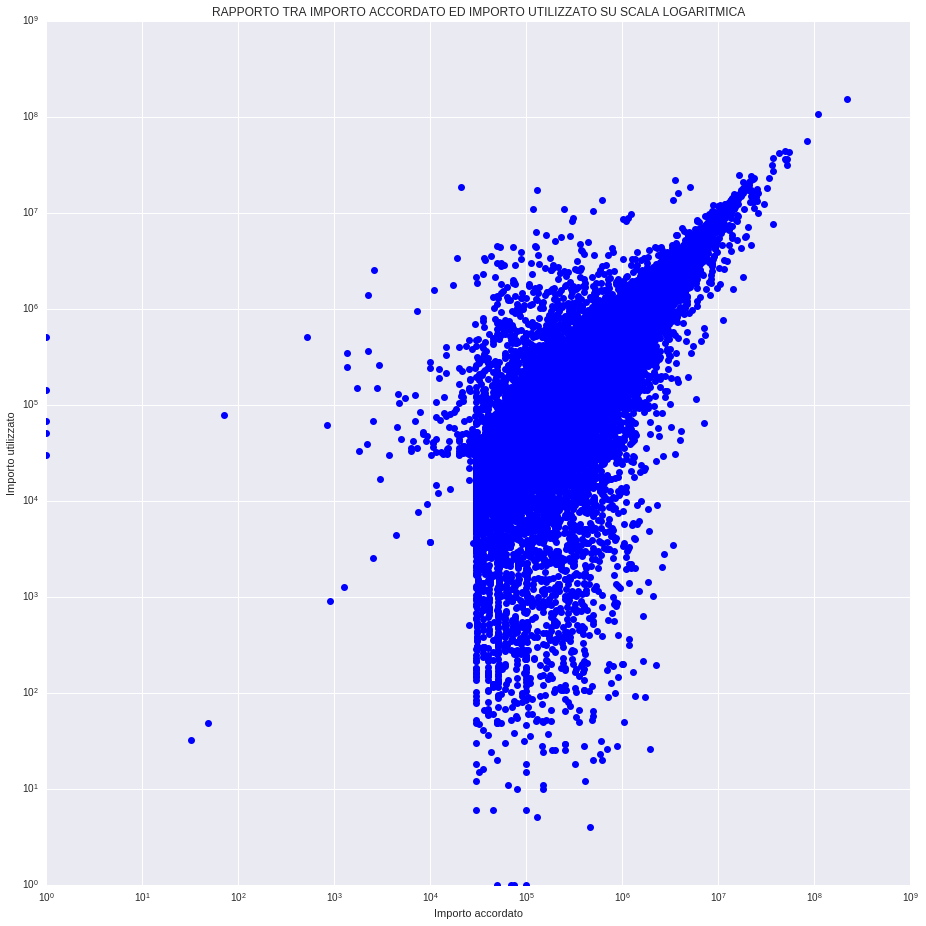

In [29]:
figure =plt.figure(figsize=(15,15))

axes = figure.add_axes([0.1,0.1,0.8,0.8])
axes.plot(cleaned_train_set['IMP_ACCORDATO'],cleaned_train_set['IMP_UTILIZZATO'],'bo')
axes.set_xlabel('Importo accordato')
axes.set_ylabel('Importo utilizzato')

axes.set_title('RAPPORTO TRA IMPORTO ACCORDATO ED IMPORTO UTILIZZATO SU SCALA LOGARITMICA')

plt.loglog()

plt.show()

In [30]:
cleaned_train_set['RAT_LOG_UT_ACC'][cleaned_train_set['RAT_LOG_UT_ACC']!=np.inf].describe()

count    53997.000000
mean         1.105232
std          1.488432
min          0.063566
25%          0.945300
50%          0.978485
75%          0.995248
max         18.613645
Name: RAT_LOG_UT_ACC, dtype: float64

In [31]:
cleaned_train_set.sort_values('RAT_LOG_UT_ACC',ascending=False).head()

,ID,COD_CAP,COD_PROVINCIA,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,...,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA,LEVERAGE,RAT_LOG_UT_ACC
35310,35311,145.0,RM,1986.0,245,430,2229.0,1,1.0,-41.0,...,719.0,3730.0,0.0,0.0,7.0,0.0,44617888.0,0.0,1.546213,18.613645
17924,17925,70124.0,BA,1984.0,505,490,4120.0,1,1995.0,431.0,...,45037.0,9393.0,5012.0,1464.0,1111.0,0.0,39920879.0,685000.0,-2.182653,18.502410
32816,32817,31044.0,TV,1990.0,451,430,15201.0,1,734.0,83.0,...,0.0,33715.0,0.0,0.0,45.0,0.0,25505914.0,0.0,-1.142605,18.054421
37144,37145,43126.0,PR,1991.0,830,430,412.0,1,76.0,-4507.0,...,3777.0,8135.0,1228.0,50.0,644.0,0.0,14712594.0,0.0,-5.995471,17.504214
54177,54178,58022.0,GR,2005.0,660,430,55201.0,1,1170.0,-530.0,...,10763.0,2929.0,2610.0,346.0,1557.0,0.0,14195215.0,0.0,62.240909,17.468416


In [32]:
np.percentile(cleaned_train_set['RAT_LOG_UT_ACC'],q=98)

1.1314696920895471

In [33]:
cleaned_train_set[(cleaned_train_set['RAT_LOG_UT_ACC']>1.1314696920895471)&(cleaned_train_set['FLG_DEF_6M']==1)].count()

ID                                   1017
COD_CAP                              1016
COD_PROVINCIA                         975
DAT_COSTITUZIONE                      999
COD_RAE                              1017
COD_SAE                              1017
COD_ISTAT_ATECO_07                   1013
FLG_DEF_6M                           1017
CBI201312_CREDITI                    1017
CBI201312_UTILE_PERDITA_ESERCIZIO    1017
CBI201312_PATRIMONIO_NETTO           1017
CBI201312_DEBITI_CONSOLIDATI         1017
CBI201312_DEBITI_ENTRO_ES_SUCC       1017
CBI201312_RICAVI_NETTI               1017
CBI201312_ACQUISTI_NETTI             1017
CBI201312_COSTI_SERVZ_BENI_TERZI     1017
IMP_ACCORDATO                        1017
IMP_UTILIZZATO                       1017
IMP_VALORE_GARANZIA                  1017
LEVERAGE                             1017
RAT_LOG_UT_ACC                       1017
dtype: int64

In [34]:
cleaned_train_set.describe()

/home/bigdive/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning:

Invalid value encountered in percentile



,ID,COD_CAP,DAT_COSTITUZIONE,COD_RAE,COD_SAE,COD_ISTAT_ATECO_07,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA,LEVERAGE,RAT_LOG_UT_ACC
count,53997.000000,53992.000000,53973.000000,53997.000000,53997.000000,53831.000000,53997.000000,53997.000000,53997.000000,53997.000000,53997.000000,5.399700e+04,5.399700e+04,5.399700e+04,53997.000000,5.399700e+04,5.399700e+04,5.399700e+04,5.399700e+04,53997.000000
mean,37387.706224,38673.843532,1996.256387,568.176695,442.077430,110912.816890,0.137674,475.190529,9.194326,289.402078,231.300443,6.903363e+02,1.227074e+03,5.660812e+02,331.304943,7.421129e+05,5.520887e+05,3.981503e+04,inf,1.105232
std,17602.810894,25514.649194,12.658344,209.961283,30.042428,211139.830877,0.344561,3028.881372,275.938893,1505.764856,726.931477,5.293496e+03,6.730968e+03,7.762285e+03,786.714279,1.796007e+06,1.461651e+06,5.832708e+05,NaN,1.488432
min,10.000000,10.000000,1800.000000,0.000000,177.000000,1.000000,0.000000,0.000000,-18087.000000,-29509.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-3.237000e+03,0.063566
25%,23290.000000,NaN,NaN,453.000000,430.000000,NaN,0.000000,87.000000,-4.000000,20.000000,0.000000,1.740000e+02,3.100000e+02,4.700000e+01,70.000000,1.300000e+05,7.051400e+04,0.000000e+00,1.000000e+00,0.945300
50%,37869.000000,NaN,NaN,614.000000,430.000000,NaN,0.000000,243.000000,4.000000,84.000000,45.000000,3.810000e+02,6.850000e+02,2.020000e+02,162.000000,3.525870e+05,2.261330e+05,0.000000e+00,3.305010e+00,0.978485
75%,52417.000000,NaN,NaN,660.000000,430.000000,NaN,0.000000,547.000000,24.000000,264.000000,203.000000,7.850000e+02,1.402000e+03,5.540000e+02,352.000000,8.407070e+05,5.919600e+05,0.000000e+00,9.492063e+00,0.995248
max,66811.000000,98168.000000,2015.000000,984.000000,759.000000,960909.000000,1.000000,650149.000000,33794.000000,235324.000000,50923.000000,1.166597e+06,1.255724e+06,1.615554e+06,48990.000000,2.187011e+08,1.538478e+08,7.687976e+07,inf,18.613645


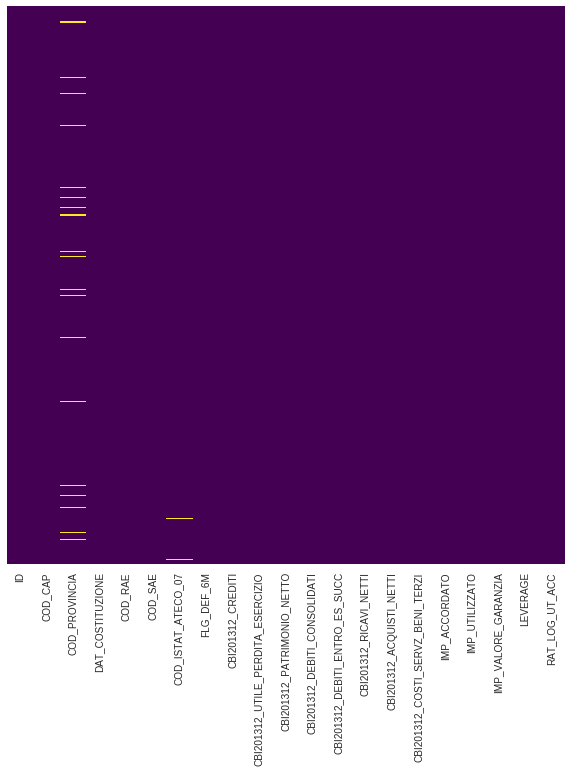

In [35]:
#Analisi dati mancanti
plt.figure(figsize=(10,10))
sns.heatmap(cleaned_train_set.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [36]:
#METTIAMO A ZERO I ROE CHE HANNO COME VALORE NaN
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

#cleaned_train_set['ROE']=imp.fit_transform(cleaned_train_set['ROE'])
#cleaned_train_set['ROE_LOG']=cleaned_train_set['ROE_LOG'].replace([np.nan,-np.nan],0)

In [37]:
# PER VALUTARE SE E' CORRETTO ATTRIBUIRE ZERO AL ROE_LOG CON VALORE A ZERO CREIAMO UNA COLONNA ROE NON LOGARITMICA 
#A CUI ASSEGNEREMO IL VALORE -100 AI ROE NAN

In [38]:
# CREIAMO UNA NUOVA COLONNA CHE CONTIENE IL VALORE ROE
cleaned_train_set['ROE']=(cleaned_train_set['CBI201312_UTILE_PERDITA_ESERCIZIO']+0.0001)/(cleaned_train_set['CBI201312_PATRIMONIO_NETTO']+0.0001)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [39]:
#VERIFICO DI NON AVERE PIU' ROE A NAN
cleaned_train_set[['CBI201312_UTILE_PERDITA_ESERCIZIO','CBI201312_PATRIMONIO_NETTO','ROE']].head()

,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,ROE
9,-3.0,7.0,-0.428551
10,9.0,239.0,0.037657
11,2.0,-1204.0,-0.001661
13,1.0,13.0,0.076930
20,167.0,-33.0,-5.060624


In [40]:
cleaned_train_set[['CBI201312_UTILE_PERDITA_ESERCIZIO','CBI201312_PATRIMONIO_NETTO','ROE']].describe()

,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,ROE
count,53997.000000,53997.000000,5.399700e+04
mean,9.194326,289.402078,7.401255e+02
std,275.938893,1505.764856,2.013966e+05
min,-18087.000000,-29509.000000,-4.629999e+06
25%,-4.000000,20.000000,-1.127198e-02
50%,4.000000,84.000000,5.479484e-02
75%,24.000000,264.000000,2.513093e-01
max,33794.000000,235324.000000,4.628000e+07


In [41]:
cleaned_train_set['RATIO_RIC_AN']=(cleaned_train_set['CBI201312_RICAVI_NETTI']+0.0001)/(cleaned_train_set['CBI201312_PATRIMONIO_NETTO']+cleaned_train_set['CBI201312_DEBITI_CONSOLIDATI']+cleaned_train_set['CBI201312_DEBITI_ENTRO_ES_SUCC']+0.0001)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [42]:
cleaned_train_set[['CBI201312_RICAVI_NETTI','CBI201312_PATRIMONIO_NETTO','CBI201312_DEBITI_CONSOLIDATI','CBI201312_DEBITI_ENTRO_ES_SUCC','RATIO_RIC_AN']].describe()

,CBI201312_RICAVI_NETTI,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,RATIO_RIC_AN
count,5.399700e+04,53997.000000,53997.000000,5.399700e+04,5.399700e+04
mean,1.227074e+03,289.402078,231.300443,6.903363e+02,8.721256e+04
std,6.730968e+03,1505.764856,726.931477,5.293496e+03,8.997062e+05
min,0.000000e+00,-29509.000000,0.000000,0.000000e+00,-4.940495e+02
25%,3.100000e+02,20.000000,0.000000,1.740000e+02,6.398105e-01
50%,6.850000e+02,84.000000,45.000000,3.810000e+02,1.153461e+00
75%,1.402000e+03,264.000000,203.000000,7.850000e+02,1.827529e+00
max,1.255724e+06,235324.000000,50923.000000,1.166597e+06,6.442000e+07


In [43]:
cleaned_train_set[['CBI201312_RICAVI_NETTI','CBI201312_PATRIMONIO_NETTO','CBI201312_DEBITI_CONSOLIDATI','CBI201312_DEBITI_ENTRO_ES_SUCC','RATIO_RIC_AN']][cleaned_train_set['RATIO_RIC_AN'].isnull()].head().T

""
CBI201312_RICAVI_NETTI
CBI201312_PATRIMONIO_NETTO
CBI201312_DEBITI_CONSOLIDATI
CBI201312_DEBITI_ENTRO_ES_SUCC
RATIO_RIC_AN


In [44]:
#PASSIVITA' CIRCOLANTE
cleaned_train_set['RATIO_DEBITI_RIC']=(cleaned_train_set['CBI201312_DEBITI_ENTRO_ES_SUCC']+0.0001)/(cleaned_train_set['CBI201312_RICAVI_NETTI']+0.0001)

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [45]:
cleaned_train_set['RATIO_DEBITI_RIC'].describe()

count    5.399700e+04
mean     1.315994e+05
std      2.955738e+06
min      8.689607e-09
25%      3.222346e-01
50%      5.319517e-01
75%      8.877069e-01
max      3.371500e+08
Name: RATIO_DEBITI_RIC, dtype: float64

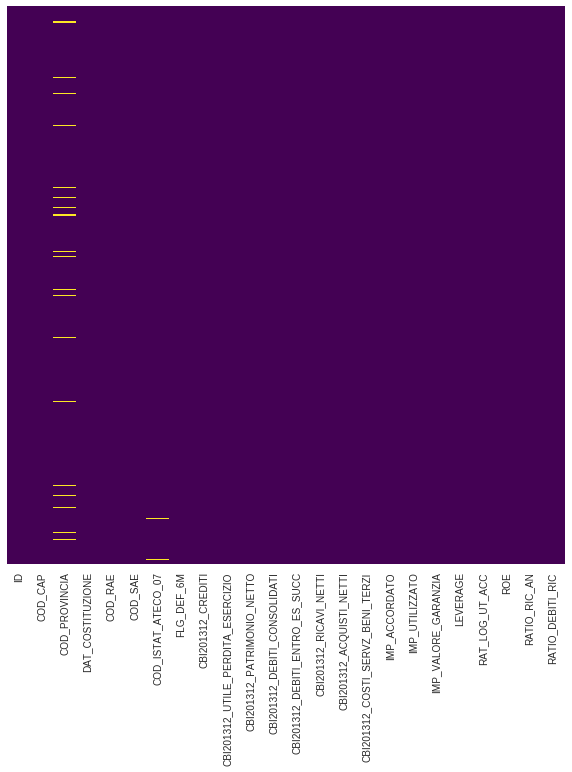

In [46]:
#Analisi dati mancanti
plt.figure(figsize=(10,10))
sns.heatmap(cleaned_train_set.isnull(),yticklabels=False, cbar=False,cmap='viridis')

### Modello con variabile RAT_LOG_UT_ACC

In [47]:
X = cleaned_train_set[['RAT_LOG_UT_ACC']]
X.head

<bound method DataFrame.head of        RAT_LOG_UT_ACC
9            0.068245
10           0.995402
11           0.994098
13           0.958321
20           0.802260
31           0.988789
32           0.941414
33           0.862548
34           0.965750
36           0.918758
37           1.006740
40           0.990725
41           0.987062
42           1.000000
48           0.883778
50           0.912641
52           0.906167
53           0.992618
54           1.000000
55           0.991920
58           0.966310
59           0.992191
67           0.999993
69           0.973449
77           0.989157
84           0.990740
85           0.913619
86           0.979458
89           0.982321
90           0.985753
...               ...
66781        0.921971
66782        0.929823
66783        0.999247
66784        0.938231
66785        0.086232
66786        0.868710
66787        0.080596
66788        0.085365
66789        1.000000
66790        0.999709
66791        0.966083
66792        0.948756


In [48]:
target= cleaned_train_set.FLG_DEF_6M
target.head(10)

9     0
10    0
11    0
13    0
20    0
31    0
32    0
33    0
34    0
36    0
Name: FLG_DEF_6M, dtype: int64

In [49]:
from sklearn import linear_model
from sklearn import metrics, cross_validation

In [50]:
X_train, X_test, y_train, y_test =cross_validation.train_test_split(X,target,test_size = 0.3)

In [51]:
modelsimple = linear_model.LogisticRegression()
modelsimple.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
print "ACC:", metrics.accuracy_score( y_train, modelsimple.predict(X_train))
print metrics.roc_auc_score(y_train, modelsimple.predict_proba(X_train)[:,1])

ACC: 0.875334021219
0.824773180976


In [53]:
print "ACC:", metrics.accuracy_score( y_test, modelsimple.predict(X_test))
print metrics.roc_auc_score(y_test, modelsimple.predict_proba(X_test)[:,1])

ACC: 0.873950617284
0.818664435761


In [54]:
metrics.roc_auc_score(y_test, modelsimple.predict_proba(X_test)[:,1])

0.81866443576100212

In [55]:
modelsimple = linear_model.LogisticRegression(penalty='l2')
#modelsimple.fit(X_train, y_train)
c = np.logspace(-2, 0.2, 20)

{"C": c}
gs = grid_search.GridSearchCV(modelsimple, {"C": c},  cv=10, scoring='roc_auc')
gs.fit(X_train, y_train)
print "best Gamma:",gs.best_params_

best Gamma: {'C': 0.022251967709560273}


In [56]:
print metrics.accuracy_score(y_test, gs.predict(X_test))


0.873950617284


In [57]:
metrics.confusion_matrix(y_test, gs.predict(X_test))

array([[13951,    17],
       [ 2025,   207]])